# Arreglos con numpy. Parte I

## Programación para Analítica de Datos 

### Mtra. Gisel Hernández Chávez


__numpy__ es la biblioteca fundamental necesaria para la computación científica con Python. 

Esta biblioteca de código abierto contiene: 
  * Un poderoso objeto array N-dimensional (arreglo N-dimesional), 
  * Métodos avanzados de división del arreglo (_slicing_) para seleccionar elementos del mismo
  * Métodos convenientes de remodelación (_reshaping_) de arreglos e incluso contiene-entre otras- bibliotecas con rutinas numéricas como:
    * funciones básicas de álgebra lineal (numpy.linalg)
    * transformadas de Fourier básicas (numpy.fft)
    * sofisticadas capacidades de números aleatorios.(numpy.random)

NumPy se puede ampliar con código C para funciones en las que el rendimiento es muy crítico en el tiempo. 

Para mayor información puede consultar https://numpy.org/doc/stable/reference/index.html

## Contenido

1. Terminología básica sobre arreglos en numpy
2. Principales atributos de la clase ndarray
3. Creación de arreglos con array(). Forma, dimensión y tamaño
4. Transpuesta de un arreglo
5. Especificación del tipo de cada elemento del arreglo

        5.1 Durante la creación del array  
        5.2 Endianness    
        5.3 Objetos de tipos de datos dtypes    
        5.4 Creación de array estructurado especificando dtypes de cada campo (field).
    
6. Crear una matriz de tipo matrix
7. Creación de arreglos

        7.1 Con zeros(), ones() y empty()
        7.2 Arreglo relleno de un valor dado usando full()    
        7.3 Arreglo con 1 en diagonal y ceros en el resto con eye()    
        7.4 Arreglo con identity()
    
8. Arreglos de cadenas (str)
9. Creación y uso de arreglos a partir de listas
10. Creación de vector con una secuencia 

        10.1 Vector con una secuencia usando arange()    
        10.2 Creación de secuencia de flotantes con linspace()
        10.3 Creación de secuencias con tile() y repeat()
    
11. Copia y vista de un arreglo con copy() y view()
12. Indización

        12.1 Uso de _slicing_ (división ocorte) en arreglos de numpy    
        12.2 Modificación (reasignación) de elementos de un arreglo usando índices    
        12.3 Reasignación de valores de una columna con slicing    
        12.4 Uso de Ellipsis    
        12.5 Creación de un nuevo eje con newaxis
    
    






    
    

In [4]:
import numpy as np
from datetime import datetime

In [5]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
from platform import python_version

print(python_version())

3.8.12


## 1. Terminología básica sobre arreglos en numpy

+ Los __arreglos__ (array) son similares a las listas, pero son de __tamaño fijo__. 
+ Se requiere que todos los elementos de un arreglo NumPy sean del mismo tipo de datos y, por lo tanto, tendrán el mismo tamaño en la memoria.

+ El objeto principal de NumPy es el __arreglo homogéneo multidimensional__ llamado `ndarray`. 

+ La cantidad de __ejes__ (_axis_), es lo mismo que el __rango__ (_rank_) y son las filas del arreglo.
+ La __longitud__ es la cantidad de elementos del eje y son las columnas del arreglo.
    + Un arreglo de __forma_ (_shape_) 3 x 2 tiene 3 ejes (es de rango 3) y cada eje es de longitud 2.
    + Su __dimesión o tamaño__ es de 3 x 2 = 6


El arreglo contiene elementos (generalmente números), todos del mismo tipo, indexados por una tupla de enteros positivos. Los ejemplos típicos de arreglos incluyen **vectores (1D)**, **matrices (2D)**, imágenes, video, sonido (**3D o más**). En general se les llama **tensores**

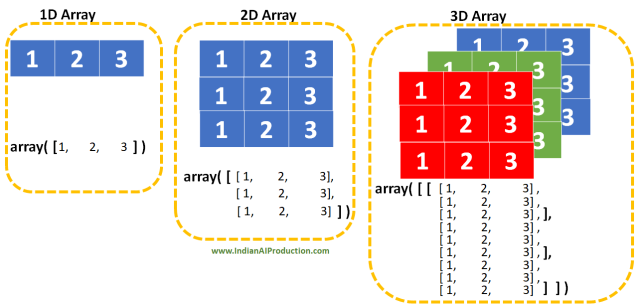

Un **array de dimensión 0** es un **escalar**


In [7]:
#np.ndarray?

In [8]:
#np.array?

In [9]:
# Propiedades de la clase ndarray: atributos y métodos
#dir(np.ndarray)

## 2. Principales atributos de la clase ndarray

ndarray es la clase de un objeto array

**ndarray.ndim**
Dimensión del arreglo: 1 para un vector, 2 para una matriz y así sucesivamente.

**ndarray.shape**
Tupla de enteros con las dimensiones del arreglo. Para una matriz con filas y columnas tendrá la forma (n,m). La longitud de la tupla es el rango ndim. 

**ndarray.size**
Cantidad total de elementos del arreglo (producto de los elementos de shape).

**ndarray.dtype**
Objeto que describe los tipos de elementos del arreglo. Se pueden crear o especificar los dtype usando los tipos estándard de Python. NumPy provee muchos, como por ejemplo: bool_, character, int_, int8, int16, int32, int64, float_, float8, float16, float32, float64, complex_, complex64, object_. 

**ndarray.itemsize**
Tamaño en bytes de cada elemento del array. Por ejemplo, para los elementos de tipo float64, itemsize es 8 (=64/8),mientras que los complex32 tienen itemsize 4 (=32/8) (equivalente a ndarray.dtype.itemsize). 

**ndarray.data**
Buffer que contiene los elementos reales del arreglo. Normalmente no necesitaremos usar este atributo debido a que accesaremos a los elementos del arreglo usando las facilidades de índices. 

Veamos los siguientes dos arreglos:

| array                                         | rango, ejes, longitud                               |
|---------------------------------------------- | ----------------------------------------------|
| [7, 5, -1] 			                        | Arreglo de rango 1. Tiene un eje de longitud 3        |   
| [ [ 1.5, 0.2, -3.7] , [ 0.1, 1.7, 2.9] ]  	| Arreglo de rango 2. Tiene 2 ejes, ambos de longitud 3 y tamaño 6 |

## 3. Creación de arreglos con array(). Forma, dimensión y tamaño

+ array() es un método que crea y devuelve un objeto de tipo ndarray.

In [10]:
# Arreglo de dimensión 0 es lo mismo que un escalar
arr_escalar = np.array(8)  # Note que 42 no va entre corchetes

print(arr_escalar,type(arr_escalar),'dimensión: ',arr_escalar.ndim)

8 <class 'numpy.ndarray'> dimensión:  0


In [11]:
type(arr_escalar)
arr_escalar

numpy.ndarray

array(8)

In [10]:
# Arreglo de dimensión 1 con un solo elemento
arr_1d = np.array([42]) # Note que va entre corchetes
f'shape: {arr_1d.shape}'
print(arr_1d,type(arr_1d),'dimensión: ',arr_1d.ndim)

'shape: (1,)'

[42] <class 'numpy.ndarray'> dimensión:  1


In [11]:
# Arreglo de dimensión 1 con un 2 elementos 
arr_1d2 = np.array([42,52]) # Note que va entre corchetes
f'shape: {arr_1d2.shape}'
print(arr_1d2,type(arr_1d2),'dimensión: ',arr_1d2.ndim, 'total de elementos',arr_1d2.size)

'shape: (2,)'

[42 52] <class 'numpy.ndarray'> dimensión:  1 total de elementos 2


In [12]:
# Arreglo de dimensión 2 con un solo elemento 
arr_2d1 = np.array([[42]])
arr_2d1
f'shape: {arr_2d1.shape}'
print(arr_2d1,type(arr_2d1),'dimensión: ',arr_2d1.ndim, 'total de elementos',arr_2d1.size)

array([[42]])

'shape: (1, 1)'

[[42]] <class 'numpy.ndarray'> dimensión:  2 total de elementos 1


In [13]:
# Arreglo de dimensión 2 con 1 fila y dos columnas; 2 elementos 
arr_2d12 = np.array([[42,52]])
arr_2d12
f'shape: {arr_2d12.shape}'
print(arr_2d12,type(arr_2d12),'dimensión: ',arr_2d12.ndim, 'total de elementos',arr_2d12.size)

array([[42, 52]])

'shape: (1, 2)'

[[42 52]] <class 'numpy.ndarray'> dimensión:  2 total de elementos 2


In [14]:
# Arreglo de dimensión 2 con 2 filas y 1 columna; 2 elementos 
arr_2d21 = np.array([[42],[52]])
arr_2d21
f'shape: {arr_2d21.shape}'
print(arr_2d21,type(arr_2d21),'dimensión: ',arr_2d21.ndim, 'total de elementos',arr_2d21.size)

array([[42],
       [52]])

'shape: (2, 1)'

[[42]
 [52]] <class 'numpy.ndarray'> dimensión:  2 total de elementos 2


In [15]:
# Arreglo de dimensión 2 con 2 filas y dos columnas; 4 elementos
arr_2d22 = np.array([[42,52],[33,77]])
arr_2d22
f'shape: {arr_2d22.shape}'
print(arr_2d22,type(arr_2d22),'dimensión: ',arr_2d22.ndim, 'total de elementos',arr_2d22.size)

array([[42, 52],
       [33, 77]])

'shape: (2, 2)'

[[42 52]
 [33 77]] <class 'numpy.ndarray'> dimensión:  2 total de elementos 4


In [16]:
# arreglo 2d: matriz
a = np.array([[0, 0, 0],
       [1, 2, 3],
       [2, 2, 2],
       [9, 9, 9]])
f'Dimensión: {a.ndim}'
f'Forma: {a.shape}'
f'Tipo: {a.dtype}'
f'Total de elementos del arreglo: {a.size}'
f'Dirección: {a.data}'
f'Tamaño de cada elemento: {a.itemsize}'
f'Clase del objeto:{ a} es {type(a)}'

'Dimensión: 2'

'Forma: (4, 3)'

'Tipo: int32'

'Total de elementos del arreglo: 12'

'Dirección: <memory at 0x000001F372DF1080>'

'Tamaño de cada elemento: 4'

"Clase del objeto:[[0 0 0]\n [1 2 3]\n [2 2 2]\n [9 9 9]] es <class 'numpy.ndarray'>"

### El tipo de los elementos será el del tipo de mayor precisión

In [17]:
# A todos los hace flotantes
np.array([1, 2, 3.0])

array([1., 2., 3.])

In [18]:
xxxx = np.array([1, 2, 3.0])
xxxx.itemsize,xxxx.dtype

(8, dtype('float64'))

In [19]:
acad = np.array([['a','Hola'],['Abraham', 'Tú']])
acad,acad.itemsize,acad.dtype,acad.size

(array([['a', 'Hola'],
        ['Abraham', 'Tú']], dtype='<U7'),
 28,
 dtype('<U7'),
 4)

In [20]:
# Note el truncamiento porque al crealo el tipo es duna cadena de 7 caracteres
acad[1,1] = 'Todo el mundo'
acad

array([['a', 'Hola'],
       ['Abraham', 'Todo el']], dtype='<U7')

### 5.2 Endianness

+ En computación, **endianness** es el orden o secuencia de bytes de una palabra de datos digitales en la memoria de la computadora. 
+ Se expresa principalmente como **big-endian** o **little-endian**.
+ Un **sistema big-endian** almacena el **byte más significativo** de una palabra en la **dirección de memoria más pequeña** y el byte menos significativo en la más grande.
+ En numpy **big-endian** se denota con **>**
+ En numpy **little-endian** se denota con **<**

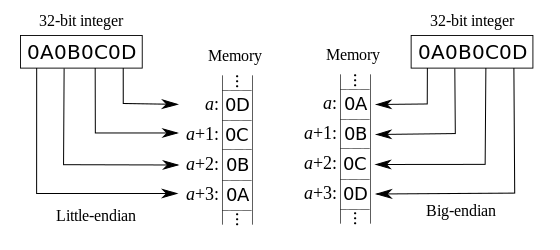

Tomado de https://medium.com/worldsensing-techblog/big-endian-or-little-endian-37c3ed008c94

## 4. Transpuesta de un arreglo

Pasa las filas a columnas

In [22]:
# T es un atributo del arreglo
a
a.T

array([[0, 0, 0],
       [1, 2, 3],
       [2, 2, 2],
       [9, 9, 9]])

array([[0, 1, 2, 9],
       [0, 2, 2, 9],
       [0, 3, 2, 9]])

### Tamaño de un arreglo

In [23]:
c =np.array([999999999999,1])
f' Cada elemento del array tiene un tamaño de {c.itemsize} bytes'  #Length of one array element in bytes.
c.dtype

' Cada elemento del array tiene un tamaño de 8 bytes'

dtype('int64')

In [13]:
c2 =np.array([1,1])
f' Cada elemento del array tiene un tamaño de {c2.itemsize} bytes'  #Length of one array element in bytes.
c2.dtype

' Cada elemento del array tiene un tamaño de 4 bytes'

dtype('int32')

## 5. Especificación del tipo de cada elemento del arreglo

### 5.1 Durante la creación del array

+ El signo mayor es de la notación big-endian; byte + significativo en la menor dirección

In [27]:
# El signo mayor es la notación big-endian; byte + significativo en la menor dirección
b = np.array([777777777,1],dtype = '<i8')  # entero de 8 bytes (int64)
b.itemsize, b.dtype

(8, dtype('int64'))

In [28]:
# El signo mayor es la notación big-endian; byte + significativo en la menor dirección
b1 = np.array([777777777,1])  # entero de 8 bytes (int64)
b1.itemsize, b.dtype

(4, dtype('int64'))

In [29]:
np.ndarray.itemsize?

### 5.3 Objetos de tipos de datos dtypes

Un objeto de tipo de datos (una **instancia de la clase numpy.dtype**) describe cómo deben interpretarse los bytes en el bloque de memoria de tamaño fijo correspondiente a un elemento de un arreglo. Describe los siguientes aspectos de los datos:

+ Tipo de datos (entero, flotante, objeto de Python, etc.)
+ Tamaño de los datos (cuántos bytes hay)
+ Orden de bytes de los datos (little-endian o big-endian)

+ dtypes puede describir a un dtype simple como un entero: '<i4'
    + Para describir un dtypes escalar, contamos con varios **tipos escalares incorporados** en NumPy para varias precisiones de números enteros, números de coma flotante, etc. Un elemento extraído de un arreglo, por ejemplo, mediante indexación, será un objeto de Python cuyo tipo es el tipo escalar asociado con el tipo de datos del arreglo.
+ Si el tipo de datos es un tipo de **"datos estructurados"**, entonces tendremos un agregado de otros tipos de datos (por ejemplo, que describe un elemento de arreglo que consiste en un número entero y un flotante), cuáles son los nombres de los "campos" de la estructura, por los cuales se puede acceder, cuál es el tipo de datos de cada campo, y qué parte del bloque de memoria ocupa cada campo.
+ Si el tipo de datos es un **subarreglo**, cuál es su forma y tipo de datos.

In [30]:
# Especificando el tipo complex
np.array([1, 2, 3], dtype=complex)  # En Python se usa la j para la parte imaginaria

array([1.+0.j, 2.+0.j, 3.+0.j])

### Lista de tipos de datos en Numpy y caracteres usados para representarlos.

i - integer

b - boolean

u - unsigned integer

f - float

c - complex float

m - timedelta

M - datetime

O - object

S - string

U - unicode string

V - fixed chunk of memory for other type ( void )


In [14]:
# Un tipo de datos simple que contiene un entero big-endian de 32 bits:

dt = np.dtype('>i4') # dt es un objeto (instancia) del tipo (clase) dtypes

# Visualización de atributos del objeto dt
dt.byteorder

dt.itemsize

dt.name

dt.type is np.int32


'>'

4

'int32'

True

### 5.4 Creación de array estructurado especificando dtypes de cada campo (field)

+ Los campos o columnas tienen nombres

In [32]:
# Arreglo estructurado donde los campos (field) tienen nombre y se especifica un tipo para cada campo
x = np.array([(1,2),(3,4)],dtype=[('a','<i4'),('b','<i4')])
x.shape
x.dtype
x.ndim


(2,)

dtype([('a', '<i4'), ('b', '<i4')])

1

In [33]:
x

array([(1, 2), (3, 4)], dtype=[('a', '<i4'), ('b', '<i4')])

In [34]:
# Se consulta el contenido de toda la columna a
x['a']

array([1, 3])

In [35]:
x['b']

array([2, 4])

In [36]:
x
f'La columna a tiene a los elementos: {x["a"]}'
f'La columna b tiene a los elementos: {x["b"]}'

array([(1, 2), (3, 4)], dtype=[('a', '<i4'), ('b', '<i4')])

'La columna a tiene a los elementos: [1 3]'

'La columna b tiene a los elementos: [2 4]'

In [37]:
y = np.array([(1,2),(3,4)],dtype=[('a','<i4'),('b','<i8')])
y.shape
y.dtype
y.ndim

(2,)

dtype([('a', '<i4'), ('b', '<i8')])

1

In [38]:
y
y.itemsize # Suma los bytes de a y b. Cada item es una tupla

array([(1, 2), (3, 4)], dtype=[('a', '<i4'), ('b', '<i8')])

12

### Otro ejemplo de arreglo estructurado

Ver https://numpy.org/doc/stable/reference/arrays.dtypes.html

+ El tipo de dato estructurado contiene una cadena de 16 caracteres (en el campo ‘name’) y un subarreglo de dos flotantes de
64 bits (en el campo ‘grades’):


In [39]:
# Se crea un objeto de tipo de dato llamado dt
dt = np.dtype([('name', np.unicode_, 16), ('grades', np.int32, (2,))])
dt['name']

dt['grades']


dtype('<U16')

dtype(('<i4', (2,)))

In [40]:
dt

dtype([('name', '<U16'), ('grades', '<i4', (2,))])

### Crea arreglo y "rellena" para igualar dimensiones

In [45]:
#Crea un arreglo con datos de tipo dt
arreglo2 = np.array([[('Paula',90),('Mario',[95,100])]],dtype=dt) # Note que para igualar dimensiones repite 90 para Paula
arreglo2

array([[('Paula', [ 90,  90]), ('Mario', [ 95, 100])]],
      dtype=[('name', '<U16'), ('grades', '<i4', (2,))])

In [46]:
arreglo2['name']

array([['Paula', 'Mario']], dtype='<U16')

In [47]:
arreglo2['grades']

array([[[ 90,  90],
        [ 95, 100]]])

In [44]:
arreglo2.shape

(1, 2)

In [49]:
arreglo2[0,1]

('Mario', [ 95, 100])

In [51]:
arreglo2[0,1][0]

'Mario'

In [52]:
arreglo2[0,1][1][0]

95

## 6. Crear una matriz de tipo matrix

+ **NO** se recomienda usar np.matrix(data, dtype=None, copy=True), pues será removido. En su lugar se debe usar array() como hemos visto
+ np.asmatrix(data, dtype=None) interpreta la entrada como una matriz


In [53]:
x

array([(1, 2), (3, 4)], dtype=[('a', '<i4'), ('b', '<i4')])

In [54]:
#np.asmatrix?
m = np.asmatrix(x)
x
m

array([(1, 2), (3, 4)], dtype=[('a', '<i4'), ('b', '<i4')])

matrix([[(1, 2), (3, 4)]], dtype=[('a', '<i4'), ('b', '<i4')])

In [55]:
# Crear una matriz de tipo matrix
'''Interpreta la entrada como una matriz.

A diferencia de `matrix`, `asmatrix` no hace una copia, si la entrada ya es
una matriz o un ndarray. '''

np.mat('1 2; 3 4')

'Interpreta la entrada como una matriz.\n\nA diferencia de `matrix`, `asmatrix` no hace una copia, si la entrada ya es\nuna matriz o un ndarray. '

matrix([[1, 2],
        [3, 4]])

In [56]:
#np.mat?

In [57]:
matriz1 = np.array(np.mat('1 2; 3 4'))
matriz1

array([[1, 2],
       [3, 4]])

In [58]:
# Modificación del elemento de la matriz en la posición [0,1]
matriz1[0,1] = 3.5 # Note que convierte a entero para conservar todos los datos del mismo tipo
matriz1

array([[1, 3],
       [3, 4]])

## 7. Creación de arreglos
### 7.1 con zeros(), ones() y empty()

+ Por defecto son del tipo float, pero puede cambiar el tipo

### Creación de un vector de ceros

In [59]:
#np.zeros?

In [60]:
b = np.zeros(5) #crea un vector (arreglo de una dimensión) de longitud 5 e inicializa todos sus valores en 0.
b, b.dtype 

(array([0., 0., 0., 0., 0.]), dtype('float64'))

### Creación de un arreglo de dos dimensiones (matriz) de ceros

In [61]:
matriz = np.zeros((4,4),dtype='int') #matriz cuadrada de 4x4
matriz

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [62]:
matriz.shape

(4, 4)

In [63]:
# Crear una matriz de 3 X 2 con ceros
ejemplo_arr = np.zeros((3,2)) # por defecto los elementos son float
ejemplo_arr


array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [64]:
n = 10 
#especifica que los ceros sean enteros y no flotantes que es lo que hace por defecto
my_int_array = np.zeros(n, dtype='int') 
my_int_array 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Creación de vector con unos

In [65]:
c = np.ones(4) 
c

array([1., 1., 1., 1.])

### Crear arreglo vacío de forma y tipo dado con empty()

In [66]:
#np.empty?

In [67]:
# Devuelve un nuevo arreglo de forma y tipo determinados, sin inicializar las entradas.
z = np.empty([2, 2])
z.shape
z.ndim
z

(2, 2)

2

array([[1., 1.],
       [1., 1.]])

In [68]:
np.empty([2, 2], dtype=int) # note que inicializa con basura

array([[-727379969,        232],
       [         1,          0]])

In [69]:
np.empty( (2,3) )   

array([[0., 0., 0.],
       [0., 0., 0.]])

### 7.2 Crear arreglo relleno de un valor dado usando full()

In [70]:
#np.full?

In [71]:
np.full((2, 2), 10)

array([[10, 10],
       [10, 10]])

In [72]:
anan = np.full((2, 2), np.nan)
anan , anan.dtype

(array([[nan, nan],
        [nan, nan]]),
 dtype('float64'))

In [73]:
# Solución alternativa
unos = np.ones((2,2),dtype = int) * 10
unos

array([[10, 10],
       [10, 10]])

In [74]:
# ¿Qué pasa si modifico un elemento?
unos[0,0] =11
unos

array([[11, 10],
       [10, 10]])

In [75]:
af = np.full((2, 2), [1, 2])
af, af.dtype

(array([[1, 2],
        [1, 2]]),
 dtype('int32'))

### 7.3 Creación de arreglo con 1 en diagonal y ceros en el resto con eye()

+ np.eye(N, M=None, k=0, dtype=<class 'float'>, order='C', *, like=None)
+ N es el número de filas y M el número de columnas

Retorna un arreglo 2-D con unos en la diagonal principal sin  desplazamiento si k=0 y ceros en el resto de las posiciones.

In [76]:
#np.eye?

In [77]:
np.eye(2, dtype=int)

array([[1, 0],
       [0, 1]])

In [78]:
np.eye(2, dtype=int)

array([[1, 0],
       [0, 1]])

### Arreglo con diagonal con unos desplazados

In [81]:
np.eye(5, k=2) # con desplazamiento de 1

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [82]:
np.eye(3, k=-1) # con desplazamiento de -1

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

### 7.4 Creación de un arreglo con identity(): matriz identidad

+ Es un arreglo cuadrado con 1 en la diagonal principal

In [83]:
#np.identity?

In [84]:
# Retorna un arreglo identidad
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 8. Arreglos de cadenas (str)

In [85]:
arr = np.array(['manzanita', 'banana', 'mango'])

print(arr.dtype)
arr
# cambie banana por plátano macho y vea el efecto

<U9


array(['manzanita', 'banana', 'mango'], dtype='<U9')

In [86]:
arr.size
arr.dtype

3

dtype('<U9')

In [87]:
arr[1] = 'plátano macho' # trunca la cadena a 9 caracteres
arr
print(arr.dtype)

array(['manzanita', 'plátano m', 'mango'], dtype='<U9')

<U9


In [88]:
arr1 = np.array(['manzana', 'plátano macho', 'mango'])

print(arr1.dtype)

<U13


## 9. Creación y uso de arreglos a partir de listas

In [90]:
# A partir de una lista
lista = [[1, 2, 3], [3, 6, 9], [2, 4, 6]]  # crea una lista 
a = np.array(lista)  # para convertir la lista en arreglo 
a 

array([[1, 2, 3],
       [3, 6, 9],
       [2, 4, 6]])

In [91]:
# A partir de una lista
lista = [[1, 2, 3], [3, '6', 9], [2, 4, 6]]  # crea una lista 
a = np.array(lista)  # para convertir la lista en arreglo 
a 

array([['1', '2', '3'],
       ['3', '6', '9'],
       ['2', '4', '6']], dtype='<U11')

In [92]:
lista = [[1, 2, 3], [3, '6', 9], [2, 4, 6]]  # crea una lista 
a = np.array(lista,dtype='<U1')  # para convertir la lista en arreglo 
a 

array([['1', '2', '3'],
       ['3', '6', '9'],
       ['2', '4', '6']], dtype='<U1')

In [93]:
a[0]  # muestra la primera fila del arreglo (fila de índice 0)

array(['1', '2', '3'], dtype='<U1')

In [94]:
a[1, 2]  # muestra el elemento que está en la fila de índice 1 y columna de índice 2 

'9'

### Recordando lista por comprensión e índices

In [95]:
list2=[[1,2,3,7],[4,5,6,8]]
n=3  # posición o índice de la columna a imprimir

# Lista por comprensión
col_n = [i[n] for i in list2 if n <= len(list2[0])] #coloca en una lista los elementos de la columna n

# Convierte la lista a array
np.array(col_n) 
       

array([7, 8])

In [96]:
arrr = np.array(col_n)
arrr.shape

(2,)

## 10. Creación de secuencias
### 10.1 Vector con una secuencia usando arange()

arange([inicio,] parada[, paso,], dtype=Ninguno, *, like=Ninguno)

Devuelve valores espaciados uniformemente dentro de un intervalo dado.

Los valores se generan dentro del intervalo semiabierto ``[start, stop)``
(en otras palabras, el intervalo que incluye `start` pero excluye `stop`).
Para argumentos enteros, la función es equivalente a la función integrada de Python.
función `rango`, pero devuelve un ndarray en lugar de una lista.

In [97]:
#np.arange?

In [98]:
d = np.arange(5)  # similar a range() 
d

array([0, 1, 2, 3, 4])

In [99]:
d[1] = 9.7 
d  # los arreglos mantienen su tipo, incluso si los elementos cambian. En este caso truncó, no aproximó 

array([0, 9, 2, 3, 4])

In [100]:
print(d) #observe la diferencia en la salida si usa la función print()

[0 9 2 3 4]


### Creación de secuencia de flotantes con arange()

In [101]:
np.arange( 0, 2, 0.3 )                 

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

### 10.2 Creación de secuencia de flotantes con linspace()

+ Útil para evaluar funciones en puntos separados en intervalos iguales

np.linspace(
     comienzo,
     deténgase,
     número=50,
     punto final=Verdadero,
     retstep=falso,
     dtipo=Ninguno,
     eje=0,
)
cadena de documentación:
Devuelve números espaciados uniformemente en un intervalo específico.

Devuelve `num` muestras espaciadas uniformemente, calculadas sobre el
intervalo [`inicio`, `parada`].

El punto final del intervalo se puede excluir opcionalmente.

In [103]:
np.linspace?

In [104]:
np.linspace( 0, 2, 9 )                 # 9 números del 0 al 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [105]:
from numpy import pi
x = np.linspace( 0, 2*pi, 100 )     # para evaluar funciones en muchos puntos
x

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [106]:
x = np.linspace( 0, 100, 100 )     # para evaluar funciones en muchos puntos
x

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [107]:
x = np.linspace(0,40,100)
y = 4 + .33 * x **2

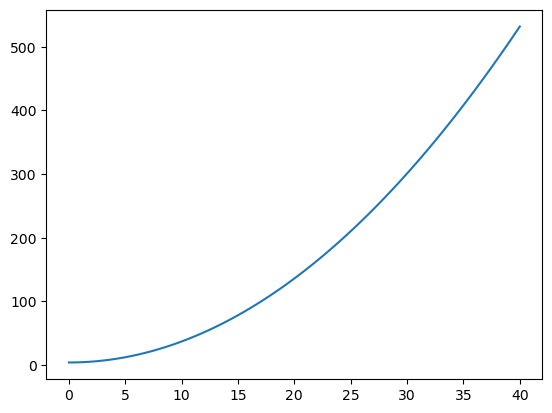

In [108]:
import matplotlib.pyplot as plt

plt.plot(x,y)

In [91]:
np.linspace(start=1, stop=50, num=10, dtype=int)  #crea un arreglo de 10 números enteros entre 1 y 50
#los números no están igualmente espaciados por el redondeo

array([ 1,  6, 11, 17, 22, 28, 33, 39, 44, 50])

In [94]:
np.linspace(start=1, stop=50, num=11, dtype=int)  #crea un arreglo de 10 números enteros entre 1 y 50
#los números no están igualmente espaciados por el redondeo

array([ 1,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

### 10.3 Creación de secuencias con tile() y repeat()

In [95]:
a=[1,2,3]  # Repite la secuencia completa dos veces
np.tile(a,2)

array([1, 2, 3, 1, 2, 3])

In [96]:
np.repeat(a,3) # Repite cada elemento de la secuencia 3 veces

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

## 11. Copia y vista de un arreglo con copy() y view()

+ view() se usa principalmente para crear una vista del mismo arreglo cambiando el tipo de datos
+ Es una copia profunda

In [97]:
#np.copy?
est1 =  np.array([[1, 2,2.2], [3, 4, 5]])
est2 = est1.copy()
est2[1,0] = 3.3
est1
est2

array([[1. , 2. , 2.2],
       [3. , 4. , 5. ]])

array([[1. , 2. , 2.2],
       [3.3, 4. , 5. ]])

In [98]:
# Copia y vista de un arreglo con copy() y view()
# Copia del array  
arr = np.array([1, 2, 3, 4, 5])
x = arr.copy()
arr[0] = 42

print(arr)
print(x)


[42  2  3  4  5]
[1 2 3 4 5]


## EJERCICIO

Verifique si np.copy() es profunda o superficial

In [99]:
#arr.view?

In [109]:
# Con view() NO hay copia; se apunta al mismo objeto. Un cambio en uno afecta al otro
arr = np.array([1, 2, 3, 4, 5])
x = arr.view() # como si hiciéramos una asignación; verificar eficiencia entre view() y asignación
arr[0] = 42 # cambio en el arreglo

print(arr)
print(x)

[42  2  3  4  5]
[42  2  3  4  5]


In [110]:
x[0] = 111 #vista
x,arr

(array([111,   2,   3,   4,   5]), array([111,   2,   3,   4,   5]))

In [111]:
x

array([111,   2,   3,   4,   5])

## 12. Indización
+ El caso más simple de indización (o indexación) con N números enteros devuelve una matriz escalar que representa el elemento correspondiente. 

+ La indexación de un array es lo mismo que acceder a un elemento del mismo.

+ Puede acceder a un elemento consultando su número de índice.

+ Los índices en las matrices NumPy comienzan con 0, lo que significa que el primer elemento tiene índice 0 y el segundo tiene índice 1, y así sucesivamente.
 
+ Los índices negativos se interpretan como contando desde el final de la matriz (es decir, si ni  < 0, significa ni + di )


In [112]:
# Imprime un elemento de un arreglo de dos dimensiones

arr2 = np.array([[1,2,3,4,5], [6,7,8,9,10]])

print('2do elemento en 1ra dim: ', arr2[0, 1], 'dimensión {}'.format(arr2.ndim))

2do elemento en 1ra dim:  2 dimensión 2


La sintaxis es más clara que la de la lista donde teníamos que usar dos corchetes

In [113]:
# Dos dimensiones en lista

lista = [[1,2,3,4,5], [6,7,8,9,10]]

print('2do elemento en 1ra dim: ', lista[0][1])

2do elemento en 1ra dim:  2


La sintaxis es más clara que la de la lista donde teníamos que usar dos corchetes

### 12.1 Uso de _slicing_ (división o corte) en arreglos de numpy


+ La división (o corte) básica extiende el concepto básico de Python de división a N dimensiones. 
+ Ocurre cuando obj es un objeto de corte (construido por notación start: stop: step dentro de paréntesis), un número entero o una tupla de objetos de corte y enteros. 
+ Los objetos de **elipsis** y **newaxis** también se pueden intercalar con estos.

In [114]:
# ¿Qué se imprime?
arr = np.array([[1+1, 2+2, 3+3, 4, 5], [6-1, 7-1, 8-1, 9, 10]])

arr

array([[ 2,  4,  6,  4,  5],
       [ 5,  6,  7,  9, 10]])

In [115]:
print(arr[0:2, 2])

[6 7]


In [116]:
# ¿Qué se imprime?
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

print(arr[0:2, 1:4])


[[2 3 4]
 [7 8 9]]


#### Visualizaciones de elementos de un arreglos usando corte

In [117]:
a = np.array([[1, 2], [3, 4], [5, 6]], float)

In [118]:
a[1, 1:3]  # muestra los elementos de la segunda fila que están en las columnas de índice 1 y 2 

array([4.])

In [119]:
a[:,1] #todos los elementos (señalado con el operador :) de la columna con índice 1 (segunda columna)

array([2., 4., 6.])

In [120]:
a[-1]  #muestra el último elemento: última fila todas las columnas

array([5., 6.])

In [121]:
a[:-1]  #muestra todos los elementos excepto el último; desde lafila 0 hasta la penúltima 

array([[1., 2.],
       [3., 4.]])

In [122]:
a[::-1]  #invierte el orden de las filas

array([[5., 6.],
       [3., 4.],
       [1., 2.]])

In [123]:
a[::-1, ]

array([[5., 6.],
       [3., 4.],
       [1., 2.]])

In [124]:
a[::-1,::-1 ]  #invierte filas y columnas

array([[6., 5.],
       [4., 3.],
       [2., 1.]])

In [125]:
a[::,::-1]  #invierte las columnas

array([[2., 1.],
       [4., 3.],
       [6., 5.]])

### 12.2 Modificación (reasignación) de elementos de un arreglo usando índices

+ Note que se usa un solo corchete y no varios como en las listas

In [126]:
a

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [127]:
try:
    a[1, 2] = 77 #modifica el valor del elemento con índice 1,2
    print(a)
except Exception as e:
    print(e) 

index 2 is out of bounds for axis 1 with size 2


### 12.3 Reasignación de valores de una columna con slicing

In [128]:
a[:, 0] = [0, 9, 8] #reasigna valores a los elementos de la primera columna
a

array([[0., 2.],
       [9., 4.],
       [8., 6.]])

In [129]:
x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
x

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [130]:
x[0]

array([[1],
       [2],
       [3]])

In [131]:
x[1]

array([[4],
       [5],
       [6]])

In [132]:
x[1:]

array([[[4],
        [5],
        [6]]])

In [133]:
x.shape

x[1:2]

(2, 3, 1)

array([[[4],
        [5],
        [6]]])

### 12.4 Uso de Ellipsis

+ Pueden leer este blog https://medium.com/techtofreedom/3-uses-of-the-ellipsis-in-python-25795aac723d
+ En numpy se usa para omitir dimensiones
+ Puede usar la cadena 'Ellipsis'
+ Puede ser usado como sustituto de pass en una función o una clase como 'placeholder' (marcador de posición que evita un error cuando se desconoce el código que irá en el bloque.

In [134]:
Ellipsis

Ellipsis

In [135]:
x[...]  #uso de elipsis para omitir dimensiones

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [136]:
x.shape

(2, 3, 1)

In [137]:
x[...,0] # uso de elipsis
x[...,0].shape
x.shape

array([[1, 2, 3],
       [4, 5, 6]])

(2, 3)

(2, 3, 1)

## Generación de números pseudoaleatorios

In [140]:
#np.random.rand?

In [142]:
np.random.rand?

In [153]:
np.random.seed(22)
A = np.random.rand(3, 3, 2)
print(A)

[[[0.20846054 0.48168106]
  [0.42053804 0.859182  ]
  [0.17116155 0.33886396]]

 [[0.27053283 0.69104135]
  [0.22040452 0.81195092]
  [0.01052687 0.5612037 ]]

 [[0.81372619 0.7451003 ]
  [0.18911136 0.00614087]
  [0.77204387 0.95783217]]]


In [154]:
'''np.random.seed(22)
np.random.rand(3, 3, 2)'''

'np.random.seed(22)\nnp.random.rand(3, 3, 2)'

In [155]:
print(A[:, :, 1]) # todas las filas, todas las clumnas, primera matriz

[[0.48168106 0.859182   0.33886396]
 [0.69104135 0.81195092 0.5612037 ]
 [0.7451003  0.00614087 0.95783217]]


In [156]:
print(A[..., 1])


[[0.48168106 0.859182   0.33886396]
 [0.69104135 0.81195092 0.5612037 ]
 [0.7451003  0.00614087 0.95783217]]


In [157]:

print(A[Ellipsis, 1])

[[0.48168106 0.859182   0.33886396]
 [0.69104135 0.81195092 0.5612037 ]
 [0.7451003  0.00614087 0.95783217]]


### 12.5 Creación de un nuevo eje con newaxis

### numpy.newaxis
+ El objeto newaxis se puede utilizar en todas las operaciones de corte para crear un eje de longitud uno. 
+ newaxis es un alias para "None", y "None" se puede utilizar en lugar de esto con el mismo resultado.

In [158]:
x
x.shape

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

(2, 3, 1)

In [159]:
# agrega un nuevo eje
x[:,np.newaxis,:,:]
x

array([[[[1],
         [2],
         [3]]],


       [[[4],
         [5],
         [6]]]])

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [160]:
x[:,np.newaxis,:,:].shape

(2, 1, 3, 1)

In [161]:
x_nue = x[:,np.newaxis,:,:]
x_nue

array([[[[1],
         [2],
         [3]]],


       [[[4],
         [5],
         [6]]]])

In [162]:
x_nue.shape

(2, 1, 3, 1)

In [163]:
x

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])


#### Ejemplo de uso de newaxis
Aquí, el __operador de índice newaxis__ inserta un nuevo eje en a, convirtiéndolo en una matriz bidimensional de 4x1. La combinación de la matriz 4x1 con b, que tiene forma (3,), produce una matriz 4x3.

In [164]:
a1 = np.array([0.0, 10.0, 20.0, 30.0])
b1 = np.array([1.0, 2.0, 3.0])
a1.shape, b1.shape

((4,), (3,))

In [165]:
a1.ndim,b1.ndim

(1, 1)

In [166]:
a1[:, np.newaxis]
a1[:, np.newaxis].shape

array([[ 0.],
       [10.],
       [20.],
       [30.]])

(4, 1)

In [167]:
a1[:, np.newaxis] + b1

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])